In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('StudentData.csv')

In [3]:
df.head()

,schoolType,COUNTY,SCHOOL,school_code,n,nMMR,nDTP,nPolio,nPBE,nPME,year
0,PRIVATE,ALAMEDA,A CHILD'S WORLD MONTE,7092463,12,12,11,9,0,0,2000
1,PRIVATE,ALAMEDA,ACAD,6972533,15,15,15,15,0,0,2000
2,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,19,17,17,17,0,0,2009
3,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,23,6,22,23,0,0,2010
4,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,27,27,27,27,0,0,2006


In [4]:
df.describe(include='all')

,schoolType,COUNTY,SCHOOL,school_code,n,nMMR,nDTP,nPolio,nPBE,nPME,year
count,109007,109007,109007,1.090070e+05,109007.000000,109007.000000,109007.000000,109007.000000,109007.000000,109007.000000,109007.000000
unique,2,59,22700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PUBLIC,LOS ANGELES,LINCOLN ELEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,81002,27425,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.941908e+06,70.347620,66.366481,66.178539,66.443329,1.231572,0.114002,2006.919776
std,NaN,NaN,NaN,1.509194e+06,44.397449,43.233869,43.020449,43.229480,3.292901,0.561375,4.316388
min,NaN,NaN,NaN,1.001000e+03,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,NaN,NaN,NaN,6.020614e+06,33.000000,30.000000,30.000000,30.000000,0.000000,0.000000,2003.000000
50%,NaN,NaN,NaN,6.049100e+06,67.000000,62.000000,62.000000,62.000000,0.000000,0.000000,2007.000000
75%,NaN,NaN,NaN,6.139638e+06,98.000000,93.000000,93.000000,93.000000,1.000000,0.000000,2011.000000


In [5]:
gf = df.groupby(['COUNTY','year']).sum()

In [6]:
gf.describe(include='all')

,school_code,n,nMMR,nDTP,nPolio,nPBE,nPME
count,8.690000e+02,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,7.453505e+08,8824.376295,8324.983890,8301.408516,8334.623705,154.487917,14.300345
std,1.595222e+09,19352.199335,18206.294706,18144.841919,18235.568726,289.545606,28.549710
min,6.002794e+06,12.000000,10.000000,10.000000,10.000000,0.000000,0.000000
25%,6.866596e+07,451.000000,416.000000,411.000000,410.000000,14.000000,1.000000
50%,2.320109e+08,2405.000000,2264.000000,2257.000000,2263.000000,57.000000,4.000000
75%,8.114539e+08,8306.000000,7972.000000,7949.000000,7995.000000,172.000000,12.000000
max,1.300980e+10,152757.000000,145237.000000,145227.000000,146399.000000,2865.000000,218.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

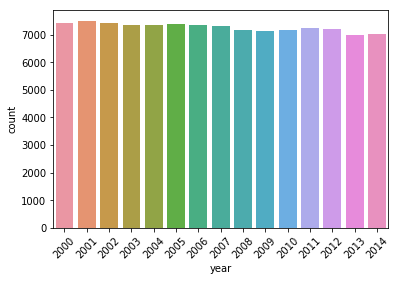

In [7]:
sns.countplot(df['year'])
plt.xticks(rotation=45)


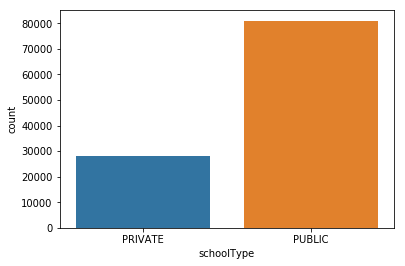

In [8]:
sns.countplot(df['schoolType'])

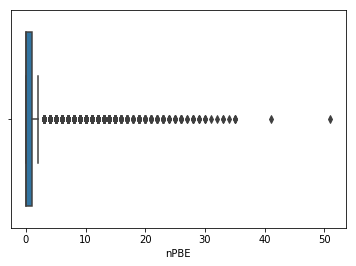

In [9]:
sns.boxplot(df[df['schoolType']=='PRIVATE']['nPBE'])

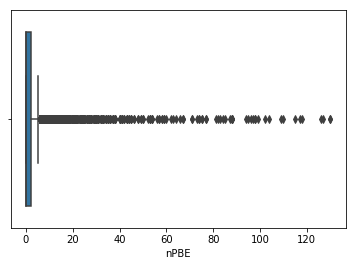

In [10]:
sns.boxplot(df[df['schoolType']=='PUBLIC']['nPBE'])

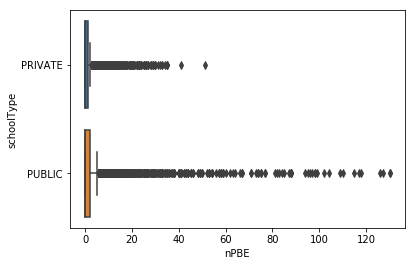

In [11]:
sns.boxplot('nPBE','schoolType',data = df)

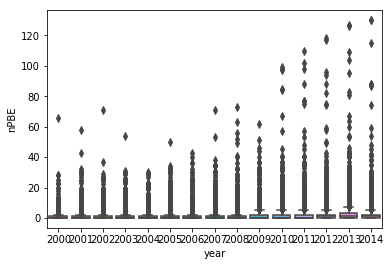

In [12]:
sns.boxplot('year','nPBE',data=df)

In [24]:
flights_long = sns.load_dataset('flights')
flights = flights_long.pivot("month", "year", "passengers")
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [26]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [42]:
cf = pd.read_csv('pertusisRates2010_2015.csv')

In [43]:
cf.head()

,county,Cases2010,Rate2010,Cases2011,Rate2011,Cases2012,Rate2012,Cases2013,Rate2013,Cases2014,Rate2014
0,CALIFORNIA,9159,24.55,3016,8.03,1023,2.70,2537,6.64,10831,28.35
1,ALAMEDA,423,30.21,206,14.59,62,4.35,124,8.55,354,24.41
2,ALPINE,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
3,AMADOR,4,10.56,11,29.48,1,2.74,2,5.52,1,2.76
4,BUTTE,32,14.55,16,7.26,3,1.36,33,14.87,30,13.52


In [44]:
rf = cf.drop(['Cases2010','Cases2011','Cases2012','Cases2013','Cases2014'],axis=1)
cf = cf.drop(['Rate2010','Rate2011','Rate2012','Rate2013','Rate2014'],axis=1)

In [45]:
cf = cf.set_index('county')
rf = rf.set_index('county')
cf = cf.drop('CALIFORNIA',axis=0)
rf = rf.drop('CALIFORNIA',axis=0)
cf.head()
rf.head()

,Rate2010,Rate2011,Rate2012,Rate2013,Rate2014
county,,,,,
ALAMEDA,30.21,14.59,4.35,8.55,24.41
ALPINE,0.00,0.00,0.00,0.00,0.00
AMADOR,10.56,29.48,2.74,5.52,2.76
BUTTE,14.55,7.26,1.36,14.87,13.52
CALAVERAS,19.80,11.08,0.00,4.39,37.35


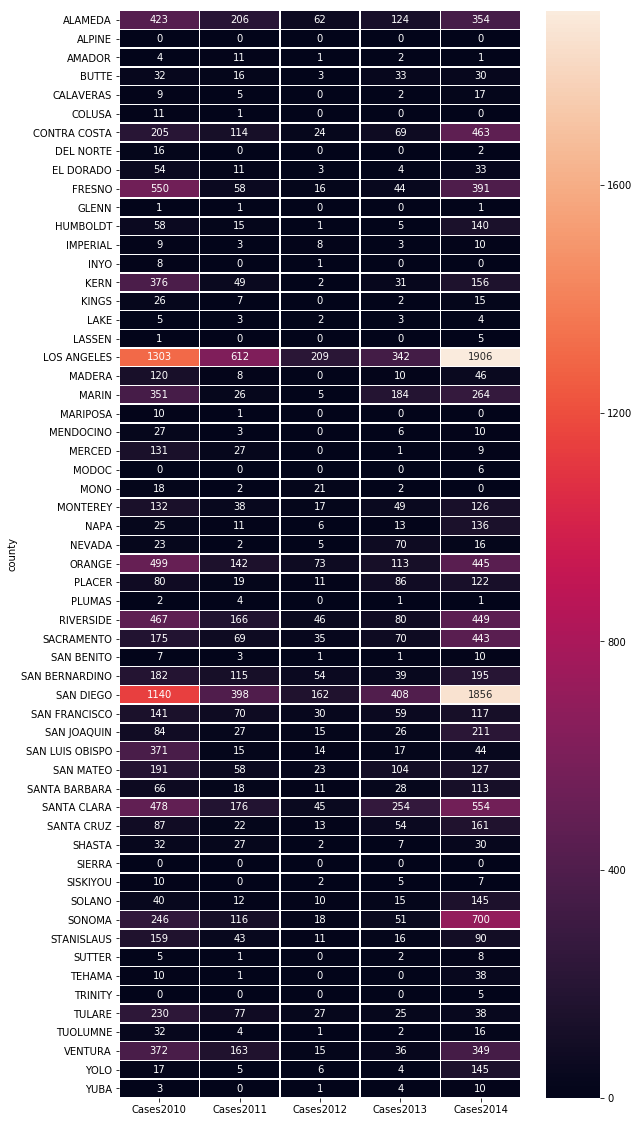

In [41]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 20))
sns.heatmap(cf, annot=True, fmt="d", linewidths=.5)

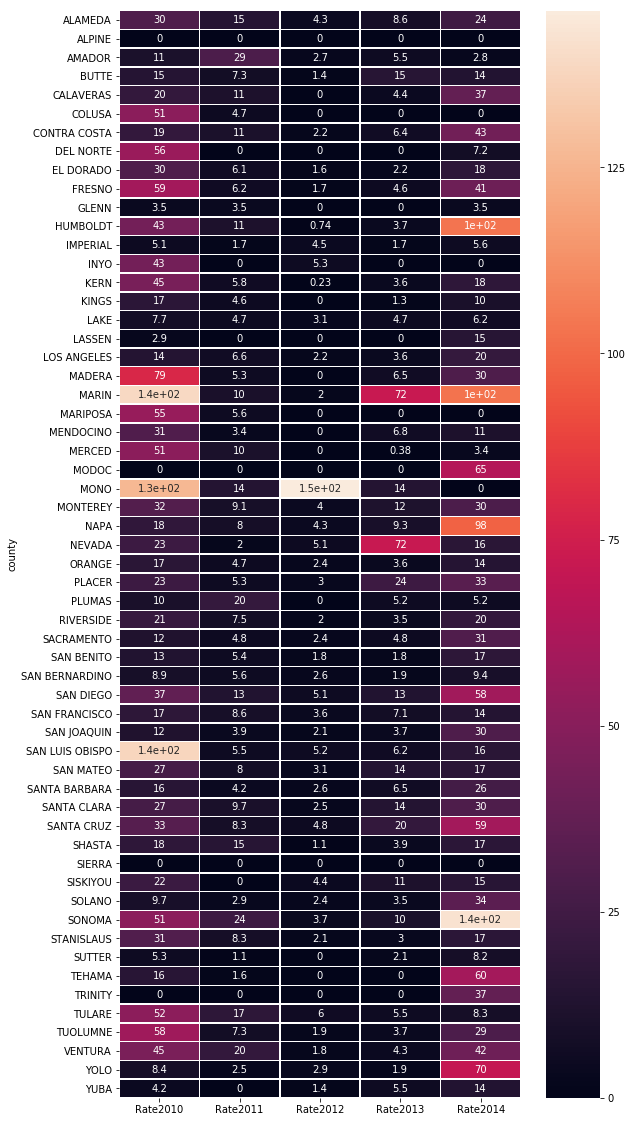

In [47]:
f, ax = plt.subplots(figsize=(9, 20))
sns.heatmap(rf, annot=True, linewidths=.5, ax=ax)

In [55]:
from string import ascii_letters

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

In [56]:
corr = d.corr()

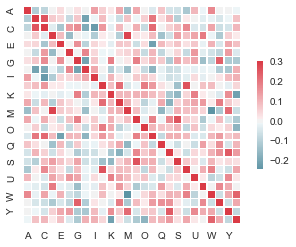

In [67]:
sns.set(style='white')
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:

g = sns.jointplot(x1, x2, kind="kde", size=7, space=0)
